[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/master/XOR_notebooks/XOR_Example1.ipynb)

https://brilliant.org/wiki/backpropagation/

Absolutely simplest back propagation example (version 2) https://www.youtube.com/watch?v=8d6jf7s6_Qs

A worked example with more neurons - https://www.youtube.com/watch?v=n2L1J5JYgUk

EXAMPLE OF AN XOR NETWORK - 2 neurons (input) in layer 1 and 1 neuron (output) in layer 2
See "Helpful Tips" at the end of the notebook

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(2)

DATA (input and output for this supervised learning problem)

In [2]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

HYPOTHESIS/MODEL

In [3]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        # Initialize attributes and methods of the parent class nn.Module
        super(XOR, self).__init__()

        # Initialize layers
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)

    # Each custom torch class (inherited from nn.Module) has to have a forward() method
    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        return x

In [4]:
model = XOR()

In [5]:
def weights_init(model):
    print(list(model.modules())) # network from above printed out
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)
            m.bias.data.normal_(0, 1)

weights_init(model) # may not be needed but used to show the idea

[XOR(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=1, bias=True)
), Linear(in_features=2, out_features=2, bias=True), Linear(in_features=2, out_features=1, bias=True)]


COST or LOSS FUNCTION

In [6]:
loss_func = nn.MSELoss()

UPDATE RULE

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9) # Another popular optimizer is ADAM

SETTING IT ALL UP

In [8]:
# Note that X, model, loss function, and optimizer are all defined/selected now
epochs = 2001
steps = X.size(0)
for i in range(epochs):

    for j in range(steps):
        data_point = np.random.randint(X.size(0))

        optimizer.zero_grad()  #resets all gradients to zero at the start of each epoch
        y_hat = model(X[data_point])
        loss = loss_func.forward(y_hat, Y[data_point]) # loss_func(y_hat, Y[data_point]) also works

        loss.backward()
        optimizer.step()

        if i == 0:
            if j == 0:
                print("First epoch gradients:\n--------------------\n")
            print(f">> Step {j}:")
            print(f"grad(lin2.weight): {model.lin2.weight.grad}")
            print(f"grad(lin2.bias): {model.lin2.bias.grad}")
            print(f"grad(lin1.weight): {model.lin1.weight.grad}")
            print(f"grad(lin1.bias): {model.lin1.bias.grad}")
            print("\n")

            if j == steps - 1:
                print("\nLoss History:")
                print("--------------------")

    if i % 500 == 0:
         print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

First epoch gradients:
--------------------

>> Step 0:
grad(lin2.weight): tensor([[0.2072, 0.6406]])
grad(lin2.bias): tensor([1.4485])
grad(lin1.weight): tensor([[-0.0459, -0.0459],
        [-0.6745, -0.6745]])
grad(lin1.bias): tensor([-0.0459, -0.6745])


>> Step 1:
grad(lin2.weight): tensor([[0.0557, 0.0741]])
grad(lin2.bias): tensor([0.4633])
grad(lin1.weight): tensor([[-0.0129, -0.0000],
        [-0.1183, -0.0000]])
grad(lin1.bias): tensor([-0.0129, -0.1183])


>> Step 2:
grad(lin2.weight): tensor([[0.5032, 0.4171]])
grad(lin2.bias): tensor([2.2253])
grad(lin1.weight): tensor([[-0., -0.],
        [-0., -0.]])
grad(lin1.bias): tensor([-0.1042, -0.6486])


>> Step 3:
grad(lin2.weight): tensor([[0.0228, 0.0319]])
grad(lin2.bias): tensor([0.1882])
grad(lin1.weight): tensor([[-0.0056, -0.0000],
        [-0.0512, -0.0000]])
grad(lin1.bias): tensor([-0.0056, -0.0512])



Loss History:
--------------------
Epoch: 0, Loss: 0.008856627158820629, 
Epoch: 500, Loss: 2.0463630789890885e-12, 
E

In [9]:
model_params = list(model.named_parameters())
print(model_params)
model_params = list(model.parameters()) # used to make below cell better

[('lin1.weight', Parameter containing:
tensor([[-2.6664, -2.6213],
        [ 2.1331,  2.1089]], requires_grad=True)), ('lin1.bias', Parameter containing:
tensor([ 0.1832, -3.4648], requires_grad=True)), ('lin2.weight', Parameter containing:
tensor([[-3.1107, -2.5639]], requires_grad=True)), ('lin2.bias', Parameter containing:
tensor([1.7752], requires_grad=True))]


USING THE INFO ABOVE, CAN YOU GET THE EQUATIONS OF THE LINES PLOTTED BELOW?

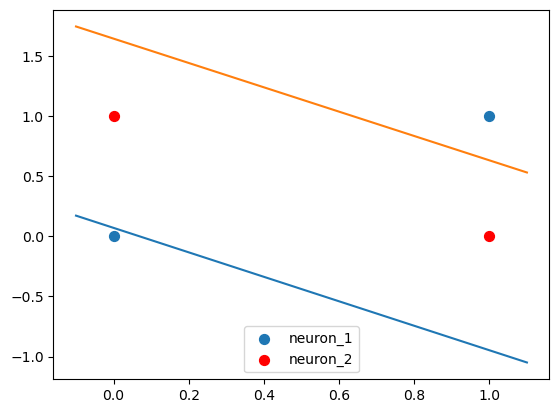

In [10]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

# weights(0,0) and (0,1) are in the (TO,FROM) format,
# i.e., to neuron 0(or 1) from input 0(or 1). See Helpful Hints at end
x_1_1 = np.arange(-0.1, 1.1, 0.1)
x_2_1_hat = ((x_1_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1_1, x_2_1_hat)

x_1_2 = np.arange(-0.1, 1.1, 0.1)
x_2_2_hat = ((x_1_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_1_2, x_2_2_hat)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()  # Recall that the lines represent theta_T*X = 0

HELPFUL TIPS

Documentation - pytorch.org

---


```
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[1][2])
>>> tensor(6)
```

```
x[0][1] = 8
print(x)
>>> tensor([[ 1,  8,  3],
            [ 4,  5,  6]])
```